# 1. 영화 리뷰 분류 : 이진 분류 예제
## 1.1 IMDB 데이터셋
### 1.1.1 리뷰 50,000개 (훈련 데이터:25,000개,테스트 데이터:25,000개)
### 1.1.2 50%는 부정, 50%는 긍정
### 1.1.3 약 17MB 정도의 크기
### 1.1.4 이미 전처리 되어 있는 데이터

In [42]:
import tensorflow.keras
import pandas as pd

from tensorflow.keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [43]:
type(train_data)

numpy.ndarray

In [44]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [45]:
train_data #단어들을 인코딩한것들

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [46]:
len(train_data[0]) # 첫번째 리뷰의 단어의 개수

218

# 데이터 프레임으로 변경

In [47]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

In [48]:
train_data_df.dtypes

0    object
dtype: object

In [49]:
train_labels_df.dtypes

0    int64
dtype: object

In [50]:
movie_df = pd.DataFrame(train_data_df)
movie_df.columns = ['train_data']
movie_df['train_labels'] = train_labels_df
movie_df # 1은 긍정 0은 부정

,train_data,train_labels
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0
...,...,...
24995,"[1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...",1
24996,"[1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...",0
24997,"[1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...",0
24998,"[1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...",1


In [51]:
movie_df.shape

(25000, 2)

In [52]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    25000 non-null  object
 1   train_labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [53]:
movie_df.dtypes

train_data      object
train_labels     int64
dtype: object

In [54]:
movie_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [55]:
movie_df.iloc[:,0]

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [56]:
movie_df.loc[:]['train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [57]:
movie_df.loc[:, 'train_data']

0        [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...
1        [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...
2        [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...
3        [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...
4        [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...
                               ...                        
24995    [1, 14, 9, 6, 2758, 20, 21, 1517, 7, 2078, 5, ...
24996    [1, 4679, 2784, 299, 6, 1042, 37, 80, 81, 233,...
24997    [1, 11, 6, 230, 245, 6401, 9, 6, 1225, 446, 2,...
24998    [1, 1446, 7079, 69, 72, 3305, 13, 610, 930, 8,...
24999    [1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8...
Name: train_data, Length: 25000, dtype: object

In [58]:
max([max(sequence) for sequence in train_data])

9999

In [59]:
from tensorflow.keras.datasets import imdb

# 데이터셋 불러오기
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 인덱스-단어 매핑 가져오기 (단어와 정수 인덱스를 매핑한 딕셔너리)
word_index = imdb.get_word_index()

# 매핑 뒤집기 (숫자를 key 단어를 value)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # items -> 딕셔너리를 쌍으로 묶게 만듬


sorted(reverse_word_index.items())

# # 리뷰 디코딩 
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# print(decoded_review)


[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [60]:
sorted(reverse_word_index.items())


[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [61]:
# for문 사용하고 train_data[1]를 reverse_word_index
# 0 , 1 , 2 는 '패딩', '문서 시작', '사전에 없음'
print(' '.join([reverse_word_index.get(i-3,"?") for i in train_data[17]]))

? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for the troops among them ? ? george ? his first sitcom role since ? 

In [62]:
print(train_data[17])

[1, 33, 4, 5673, 7, 4, 2, 194, 2, 3089, 3438, 11, 4131, 1237, 2, 2, 5, 4, 522, 2, 2, 13, 8474, 23, 35, 3077, 9731, 148, 2, 503, 503, 758, 451, 37, 5535, 4, 123, 103, 153, 7, 6397, 2, 2, 8021, 141, 17, 2, 2, 2, 2, 2, 13, 197, 36, 71, 112, 2, 5, 301, 38, 2, 2808, 320, 893, 2, 16, 95, 1376, 83, 4, 3743, 19, 49, 7197, 46, 12, 69, 2684, 35, 631, 284, 2, 56, 73, 422, 21, 488, 6239, 69, 1452, 11, 2853, 17, 6, 430, 5, 4597, 2, 2, 4, 3769, 2, 4909, 4, 635, 29, 839, 8, 27, 239, 17, 2, 2, 2, 4, 3212, 1395, 109, 284, 2, 2, 301, 11, 6, 5125, 664, 2, 2, 4, 2, 15, 29, 16, 3072, 54, 29, 557, 6239, 69, 5955, 4, 217, 21, 1283, 57, 1395, 284, 100, 28, 256, 15, 217, 17, 73, 17, 6239, 849, 10, 10, 2, 16, 4050, 5, 2, 4236, 123, 8, 2, 2, 82, 270, 11, 7627, 4, 2, 631, 513, 7, 2, 23, 2019, 69, 77, 2959, 34, 4, 893, 9147, 2, 7, 2853, 11, 572, 6, 273, 446, 2, 121, 35, 1272, 3252, 1073, 1457, 23, 287, 18, 4, 4750, 793, 98, 2, 2, 742, 2, 27, 86, 2900, 217, 237, 2, 11, 2, 1250, 2, 2, 2, 6597, 7348, 2, 2, 2, 2, 2, 8

## 데이터 준비
* 신경망을 위한 데이터로 만들기(텐서로 변환)
* 데이터를 같은 길이가 되도록 패딩 처리
* 데이터를 원-핫 인코딩으로 변환해서 벡터로 만듦

In [63]:
import numpy as np

# test 

aa = np.zeros((5,6)) # 5행 6열에다가 0을 넣음
aa[1,[0,2]] = 1.0 # 첫번째행에 0,2 열에 1.0을 넣음
aa

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [64]:
# movie_df.shape

In [65]:


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 시퀀스의 길이와 디멘션의 길이로 0 값 채워 넣기
    
    
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
        
        
    return results
    
    
# 훈련 데이터를 벡터로 변환

X_train = vectorize_sequences(train_data).astype('float32')
print(X_train[0])



# 테스트 데이터를 벡터로 변환

X_test = vectorize_sequences(test_data).astype('float32')
print(type(X_train))


y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')




[0. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>


## 신경망 모델 만들기

In [66]:
![3-layer network](https://s3.amazonaws.com/book.keras.io/img/ch3/3_layer_network.png)

zsh:1: bad pattern: [3-layer


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
# 인풋 10000

# 모델 만들기
model = Sequential()
model.add(Dense(16, input_dim=10000,activation="relu"))
model.add(Dense(16,activation='relu')) 
model.add(Dense(1,activation='sigmoid'))

In [68]:
# 모델 컴파일

# 방법1
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [69]:
# 방법2 
from tensorflow.keras import optimizers


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [70]:
# 방법3

from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[metrics.binary_accuracy])

# 훈련검증

In [71]:
x_val = X_train[:10000].astype(float)
partial_X_train = X_train[10000:].astype(float)


y_val = y_train[:10000].astype(float) # train 데이터
partial_y_train = y_train[10000:].astype(float) # validation 데이터

In [72]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5079 - binary_accuracy: 0.7817 - val_loss: 0.3778 - val_binary_accuracy: 0.8622
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3049 - binary_accuracy: 0.8969 - val_loss: 0.3038 - val_binary_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2294 - binary_accuracy: 0.9253 - val_loss: 0.2874 - val_binary_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1894 - binary_accuracy: 0.9373 - val_loss: 0.2774 - val_binary_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1560 - binary_accuracy: 0.9489 - val_loss: 0.2802 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1317 - binary_accuracy: 0.9588 - val_loss: 0.2902 - val_binary_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1

In [73]:
history.history 

{'loss': [0.5079490542411804,
  0.3049292266368866,
  0.22938723862171173,
  0.18936724960803986,
  0.1560198962688446,
  0.13173000514507294,
  0.11613717675209045,
  0.09842976182699203,
  0.08558988571166992,
  0.0741829052567482,
  0.06385299563407898,
  0.05485159531235695,
  0.047762852162122726,
  0.039925627410411835,
  0.03344690799713135,
  0.028770452365279198,
  0.025036616250872612,
  0.024320850148797035,
  0.01653248630464077,
  0.01676984503865242],
 'binary_accuracy': [0.7817333340644836,
  0.8969333171844482,
  0.9253333210945129,
  0.937333345413208,
  0.9489333629608154,
  0.9588000178337097,
  0.9638000130653381,
  0.9710000157356262,
  0.9763333201408386,
  0.9793999791145325,
  0.9824000000953674,
  0.986466646194458,
  0.9884666800498962,
  0.9905999898910522,
  0.9934666752815247,
  0.9947999715805054,
  0.9961333274841309,
  0.9951333403587341,
  0.9984666705131531,
  0.9974666833877563],
 'val_loss': [0.3777587413787842,
  0.3038220703601837,
  0.287371873855

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['binary_accuracy']
val_acc  = history.history['val_binary_accuracy']

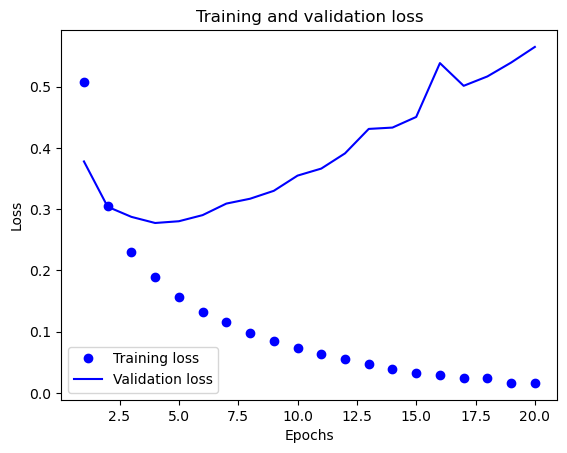

In [77]:
# 훈련과 검증 데이터에 대한 손실 비교 시각화
import matplotlib.pyplot as plt


epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 검증데이터가 5정도부터 손실이 증가하는걸 보면 과적합일 가능성있음

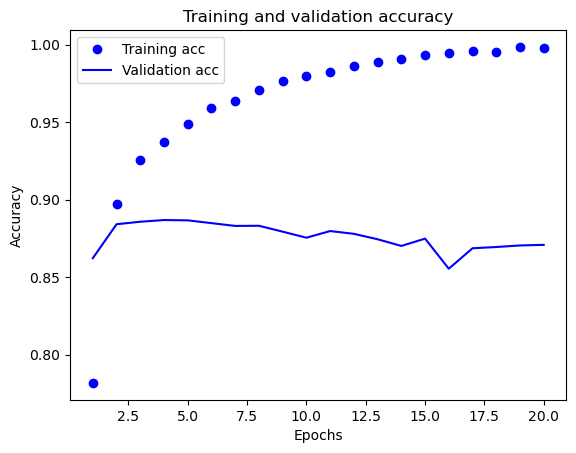

In [78]:
plt.clf()


# 정확도 비교

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# 재훈련 : epochs = 4 
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(27,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(X_test,y_test)


Epoch 1/4
49/49 [==============================] - 3s 46ms/step - loss: 0.4228 - accuracy: 0.8161
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2405 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1828 - accuracy: 0.9317
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3402 - accuracy: 0.8726


In [ ]:
model.predict(X_test)

782/782 [==============================] - 2s 3ms/step


array([[0.1772736 ],
       [0.9999199 ],
       [0.98122126],
       ...,
       [0.23683302],
       [0.13745134],
       [0.9150386 ]], dtype=float32)